# Rest-Activity Rhythms and White Matter Microstructure in Aging

* [Preprocessing](#Preprocessing)
* [TBSS](#TBSS)
* [GLM](#GLM)
  * [Trails B](#Trails-B-Performance-and-WM)
  * [Interaction Age Group x Rhythm Amplitude and WM](#Interaction-Age-Group-x-Rhythm-Amplitude-and-WM)
  * [Age Group Differences in WM](#Age-Group-Differences-in-WM)
  * [Rhythm Amplitude Main Effect within Groups](#Rhythm-Amplitude-Effect-Controlling-for-Age-and-Sex-within-Age-Groups)
* [Notes](#Notes)
* [BMI Correlations](#BMI-Correlations)

## Preprocessing

1. Run main.sh
2. Inspect all subjects for model fit

## TBSS
We performed analyses separately for older adults and young adults. These analyses were therefore conducted independently in separate directories, tbss_oa and tbss_ya.

1. Move all FA and MD files from DTI preprocessing directory to a new tbss directory
2. We will later rename all the MD files as FA for future TBSS steps. Do not get these mixed up with the actual FA data!

In [2]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

ls -d ${dtifit_dir}/sub-3*/

/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30004/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30008/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30009/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30012/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30015/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30019/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30020/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30023/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30040/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30057/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30064/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30066/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30069/
/Volumes/sch

In [3]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
work_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives

mkdir ${work_dir}/tbss_ya
mkdir ${work_dir}/tbss_oa

for sub_dir in `ls -d ${dtifit_dir}/sub-3*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_ya/
done

for sub_dir in `ls -d ${dtifit_dir}/sub-4*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_oa/
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588
40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya: File exists
mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa: File exists
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*FA.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*FA.nii.gz: No such file or directory


### TBSS 1 Preprocessing
Erodes FA images and zeroes the end slices to remove likely outliers from the diffusion tensor fitting. Generates a report called slicesdir to allow for quick scanning to detect any major issues.

In [9]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_1_preproc *FA.nii.gz

processing sub-30004_dti_FA
processing sub-30008_dti_FA
processing sub-30009_dti_FA
processing sub-30012_dti_FA
processing sub-30015_dti_FA
processing sub-30019_dti_FA
processing sub-30020_dti_FA
processing sub-30023_dti_FA
processing sub-30040_dti_FA
processing sub-30057_dti_FA
processing sub-30064_dti_FA
processing sub-30066_dti_FA
processing sub-30069_dti_FA
processing sub-30074_dti_FA
processing sub-30085_dti_FA
processing sub-30088_dti_FA
processing sub-30090_dti_FA
processing sub-30091_dti_FA
processing sub-30095_dti_FA
processing sub-30096_dti_FA
processing sub-30116_dti_FA
processing sub-30118_dti_FA
processing sub-30119_dti_FA
processing sub-30128_dti_FA
processing sub-30181_dti_FA
processing sub-30217_dti_FA
processing sub-30227_dti_FA
processing sub-30236_dti_FA
processing sub-30242_dti_FA
processing sub-30255_dti_FA
processing sub-30274_dti_FA
processing sub-30295_dti_FA
processing sub-30330_dti_FA
processing sub-30346_dti_FA
processing sub-30376_dti_FA
processing sub-30395

In [10]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/FA/slicesdir/index.html

In [7]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
ls | head -5

tbss_1_preproc *FA.nii.gz

sub-40160_dti_FA.nii.gz
sub-40170_dti_FA.nii.gz
sub-40175_dti_FA.nii.gz
sub-40288_dti_FA.nii.gz
sub-40351_dti_FA.nii.gz
processing sub-40160_dti_FA
processing sub-40170_dti_FA
processing sub-40175_dti_FA
processing sub-40288_dti_FA
processing sub-40351_dti_FA
processing sub-40490_dti_FA
processing sub-40496_dti_FA
processing sub-40512_dti_FA
processing sub-40515_dti_FA
processing sub-40516_dti_FA
processing sub-40519_dti_FA
processing sub-40520_dti_FA
processing sub-40522_dti_FA
processing sub-40524_dti_FA
processing sub-40547_dti_FA
processing sub-40550_dti_FA
processing sub-40564_dti_FA
processing sub-40601_dti_FA
processing sub-40608_dti_FA
processing sub-40615_dti_FA
processing sub-40619_dti_FA
processing sub-40623_dti_FA
processing sub-40624_dti_FA
processing sub-40629_dti_FA
processing sub-40638_dti_FA
processing sub-40649_dti_FA
processing sub-40650_dti_FA
processing sub-40653_dti_FA
processing sub-40655_dti_FA
processing sub-40656_dti_FA
processing sub-40658_dti_FA
processing s

In [8]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/FA/slicesdir/index.html

### Note 02-20-2020
I removed subjects 30330, 30476, 30227, 40515, and 40516 from analysis due to artifact.

FLIRT version 6.0

### TBSS 2 Registration
Runs the nonlinear registration, aligning all FA images to a 1x1x1mm standard space. We will use the -n option, which aligns every FA image to every other one. In the next step, we will identify the "most representative" one, and use this as the target image. This target image is then affine-aligned into MNI152 standard space, and every image is transformed into 1x1x1mm MNI152 space by combining the nonlinear transform to the target FA image with the affine transform from that target to MNI152 space.

This is highly computationally intensive, so we will run this on TACC to speed things up.

From your local machine, enter this command to move the TBSS directories to TACC. You will need to enter your TACC password and verification code to complete the file transfer.

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya username@stampede2.tacc.utexas.edu:/path/to/destination/`

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa username@stampede2.tacc.utexas.edu:/path/to/destination/`

Log into TACC using `ssh username@stampede2.tacc.utexas.edu`.

`cd path/to/destination/tbss_ya`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`. 

Do the same for older adults: <br>
`cd path/to/destination/tbss_oa`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`

This will submit 2 jobs to the queue. You can check the status of the jobs with `squeue -u username`. Wait for them to complete before moving forward.

A quick check to make sure it ran properly is: <br>
`ls tbss_ya/sub-30020* | wc -l`

For one subject, there should be (N subjects * 4) + 2 (FA and FA mask) files. In this case, we have 49 subjects, and 198 files.


### TBSS 3 Post-registration
Applies the nonlinear transforms found in the previous stage to all subjects to bring them into standard space.
This will first make the decision about which of the FA images is the most "typical", for selection as the target image to apply all nonlinear transformations into the space of. This happens by taking each FA image in turn, and estimating the average amount of warping that was necessary to align all other images to it, then finding the one that had the smallest amount of average warping when used as a target.

From the login node on TACC:

`cd /path/to/destination/tbss_ya` <br>
`tbss_3_postreg -S`

`cd /path/to/destination/tbss_oa` <br>
`tbss_3_postreg -S`

We will get a message about what the best target subject is for each group. In this case, that was: <br>

```bash

best target is sub-40782_dti_FA_FA - now registering this to standard space

best target is sub-30255_dti_FA_FA - now registering this to standard space
```

When that finishes up, we will need to transfer the results back to the local machine for inspection and to continue with analysis.

From your local machine, this can be done with:

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_ya /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/`

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_oa /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/ `

Again, you will need your TACC password and the verification code.

### QA

Now check all_FA and mean_FA_mask for any outliers or artifacts.

We restricted mean_FA_mask values to values between 0.2 and 1, since the mask output from tbss_3_postreg covers more than the white matter. This will reduce the area used in permutation testing with TFCE and increase the power of our analysis.

In [226]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz
fslmaths mean_FA -thr 0.3 -uthr 1 -bin mean_FA_mask_thr30.nii.gz

In [227]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz
fslmaths mean_FA -thr 0.3 -uthr 1 -bin mean_FA_mask_thr30.nii.gz

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fsleyes all_FA -b 0,0.8 mean_FA_skeleton -b 0.2,0.8 -l Green &

In [15]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


In [2]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


Now we're going to run TBSS on the MD, AD, and RD data

In [22]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-4*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
bash: line 9: 66825 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [26]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-3*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
bash: line 9: 67994 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [23]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-40160_dti_MD.nii.gz sub-40160_dti_FA.nii.gz
mv sub-40170_dti_MD.nii.gz sub-40170_dti_FA.nii.gz
mv sub-40175_dti_MD.nii.gz sub-40175_dti_FA.nii.gz
mv sub-40288_dti_MD.nii.gz sub-40288_dti_FA.nii.gz
mv sub-40351_dti_MD.nii.gz sub-40351_dti_FA.nii.gz
mv sub-40490_dti_MD.nii.gz sub-40490_dti_FA.nii.gz
mv sub-40496_dti_MD.nii.gz sub-40496_dti_FA.nii.gz
mv sub-40512_dti_MD.nii.gz sub-40512_dti_FA.nii.gz
mv sub-40515_dti_MD.nii.gz sub-40515_dti_FA.nii.gz
mv sub-40516_dti_MD.nii.gz sub-40516_dti_FA.nii.gz
mv sub-40519_dti_MD.nii.gz sub-40519_dti_FA.nii.gz
mv sub-40520_dti_MD.nii.gz sub-40520_dti_FA.nii.gz
mv sub-40522_dti_MD.nii.gz sub-40522_dti_FA.nii.gz
mv sub-40524_dti_MD.nii.gz sub-40524_dti_FA.nii.gz
mv sub-40547_dti_MD.nii.gz sub-40547_dti_FA.nii.gz
mv sub-40550_dti_MD.nii.gz sub-40550_dti_FA.nii.gz
mv sub-40564_dti_MD.nii.gz sub-40564_dti_FA.nii.gz
mv sub-40601_dti_MD.nii.gz sub-40601_dti_FA.nii.gz
mv sub-40608_dti_MD.nii.gz sub-40608_dti_FA.nii.gz
mv sub-40615_dti_MD.nii.gz sub-

In [27]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-30004_dti_MD.nii.gz sub-30004_dti_FA.nii.gz
mv sub-30008_dti_MD.nii.gz sub-30008_dti_FA.nii.gz
mv sub-30009_dti_MD.nii.gz sub-30009_dti_FA.nii.gz
mv sub-30012_dti_MD.nii.gz sub-30012_dti_FA.nii.gz
mv sub-30015_dti_MD.nii.gz sub-30015_dti_FA.nii.gz
mv sub-30019_dti_MD.nii.gz sub-30019_dti_FA.nii.gz
mv sub-30020_dti_MD.nii.gz sub-30020_dti_FA.nii.gz
mv sub-30023_dti_MD.nii.gz sub-30023_dti_FA.nii.gz
mv sub-30040_dti_MD.nii.gz sub-30040_dti_FA.nii.gz
mv sub-30057_dti_MD.nii.gz sub-30057_dti_FA.nii.gz
mv sub-30064_dti_MD.nii.gz sub-30064_dti_FA.nii.gz
mv sub-30066_dti_MD.nii.gz sub-30066_dti_FA.nii.gz
mv sub-30069_dti_MD.nii.gz sub-30069_dti_FA.nii.gz
mv sub-30074_dti_MD.nii.gz sub-30074_dti_FA.nii.gz
mv sub-30085_dti_MD.nii.gz sub-30085_dti_FA.nii.gz
mv sub-30088_dti_MD.nii.gz sub-30088_dti_FA.nii.gz
mv sub-30090_dti_MD.nii.gz sub-30090_dti_FA.nii.gz
mv sub-30091_dti_MD.nii.gz sub-30091_dti_FA.nii.gz
mv sub-30095_dti_MD.nii.gz sub-30095_dti_FA.nii.gz
mv sub-30096_dti_MD.nii.gz sub-

To run the tbss_non_FA script, I had to make one modification to get it to work:

```bash

#for f in `$FSLDIR/bin/imglob *_FA.*` ; do #edited MCM 02-21-2020
for f in  `$FSLDIR/bin/imglob *_FA.nii* *_FA.img* *_FA.hdr*`; do
```

In [33]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
#tbss_non_FA MD
#tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-40728_dti_FA_FA
upsampling alternative images into standard space
sub-40160_dti_FA
sub-40170_dti_FA
sub-40175_dti_FA
sub-40288_dti_FA
sub-40351_dti_FA
sub-40490_dti_FA
sub-40496_dti_FA
sub-40512_dti_FA
sub-40519_dti_FA
sub-40520_dti_FA
sub-40522_dti_FA
sub-40524_dti_FA
sub-40547_dti_FA
sub-40550_dti_FA
sub-40564_dti_FA
sub-40601_dti_FA
sub-40608_dti_FA
sub-40615_dti_FA
sub-40619_dti_FA
sub-40623_dti_FA
sub-40624_dti_FA
sub-40629_dti_FA
sub-40638_dti_FA
sub-40649_dti_FA
sub-40650_dti_FA
sub-40653_dti_FA
sub-40655_dti_FA
sub-40656_dti_FA
sub-40658_dti_FA
sub-40664_dti_FA
sub-40665_dti_FA
sub-40668_dti_FA
sub-40672_dti_FA
sub-40685_dti_FA
sub-40694_dti_FA
sub-40720_dti_FA
sub-40728_dti_FA
sub-40738_dti_FA
sub-40743_dti_FA
sub-40750_dti_FA
sub-40758_dti_FA
sub-40767_dti_FA
sub-40768_dti_FA
sub-40769_dti_FA
sub-40773_dti_FA
sub-40775_dti_FA
sub-40777_dti_FA
sub-40778_dti_FA
sub-40779_dti_FA
sub-40782_dti_FA
sub-40784_dti_FA
sub-40796_dti_FA
sub-4080

In [4]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_non_FA MD
tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-30255_dti_FA_FA
upsampling alternative images into standard space
sub-30004_dti_FA
sub-30008_dti_FA
sub-30009_dti_FA
sub-30012_dti_FA
sub-30015_dti_FA
sub-30019_dti_FA
sub-30020_dti_FA
sub-30023_dti_FA
sub-30040_dti_FA
sub-30057_dti_FA
sub-30064_dti_FA
sub-30066_dti_FA
sub-30069_dti_FA
sub-30074_dti_FA
sub-30085_dti_FA
sub-30088_dti_FA
sub-30090_dti_FA
sub-30091_dti_FA
sub-30095_dti_FA
sub-30096_dti_FA
sub-30116_dti_FA
sub-30118_dti_FA
sub-30119_dti_FA
sub-30128_dti_FA
sub-30181_dti_FA
sub-30217_dti_FA
sub-30236_dti_FA
sub-30242_dti_FA
sub-30255_dti_FA
sub-30274_dti_FA
sub-30295_dti_FA
sub-30346_dti_FA
sub-30376_dti_FA
sub-30395_dti_FA
sub-30400_dti_FA
sub-30403_dti_FA
sub-30412_dti_FA
sub-30426_dti_FA
sub-30432_dti_FA
sub-30466_dti_FA
sub-30469_dti_FA
sub-30478_dti_FA
sub-30568_dti_FA
sub-30581_dti_FA
sub-30584_dti_FA
sub-30588_dti_FA
merging all upsampled MD images into single 4D image
projecting all_MD onto mean FA skeleton
now run stats - f

## Extract mean FA, MD, AD, RD in ROI

In [181]:
%%bash

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz



In [ ]:
%%bash
# cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
# for mask in `ls ../../roi`; do
# fslmeants -i all_FA_skeletonised -m ${mask} -o ${mask}-meants.txt
# done

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
for mask in `ls ../../roi`; do
echo `fslmeants -i all_FA_skeletonised -m ${mask} -o ${mask}"-meants".txt`
done


# GLM

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

In [166]:
d = []
d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv')
d = d.sort_values('record_id', ascending = True)
d['sex'] = np.where(d['sex'] == 'Female', 0, 1)
d[0:5]

,record_id,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,...,cowat_zscore,cowat_perseveration,cowat_errors,time_trails_a,error_trails_a,trails_a_z_score,time_trails_b,error_trails_b,trails_b_z_score,neuropsych_scoring_complete
0,30003,1.389856,21.815009,14.373034,0.541285,1.236213,6.117306,22.628763,-0.556815,0.687977,...,NaN,NaN,NaN,35.0,0.0,-1.756914,97.0,0.0,-3.784870,2.0
1,30004,1.630892,4.438790,15.128163,0.000000,0.815446,6.927406,23.328920,-0.544804,0.683396,...,NaN,NaN,NaN,25.0,0.0,-0.068886,59.0,0.0,-0.673139,2.0
2,30008,1.610484,7.306045,15.569911,0.139627,0.944868,7.708287,23.431534,-0.468304,0.655135,...,NaN,NaN,NaN,27.0,0.0,-0.592431,60.0,1.0,-0.869188,2.0
3,30009,1.951245,7.026165,14.377649,0.081641,1.057264,6.388996,22.366302,-0.497424,0.665721,...,NaN,NaN,NaN,35.0,0.0,-1.216992,61.0,0.0,-0.834951,2.0
4,30012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,1.0,-1.216992,54.0,0.0,-0.268608,2.0


In [167]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.drop('files', axis=1)
oa_files = oa_files.set_index('record_id')

oa_df = []
oa_df = d[d['Group'] == 'Older Adults']
oa_df = oa_df.set_index('record_id')

oa_dsn = []
oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])

In [168]:
oa_dsn.shape

(57, 741)

In [169]:
ya_files = []
ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
ya_files['record_id'] = ya_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
ya_files = ya_files.drop('files', axis=1)
ya_files = ya_files.set_index('record_id')

ya_df = []
ya_df = d[d['Group'] == 'Young Adults']
ya_df = ya_df.set_index('record_id')

ya_dsn = []
ya_dsn = ya_files.join(ya_df, sort=True).dropna(subset = ['files'])

In [170]:
ya_dsn.shape

(46, 741)

## Trails B Performance and WM

In [6]:
d[['record_id', 'Group', 'trails_b_z_score']]

,record_id,Group,trails_b_z_score
0,30003,Young Adults,-3.784870
1,30004,Young Adults,-0.673139
2,30008,Young Adults,-0.869188
3,30009,Young Adults,-0.834951
4,30012,Young Adults,-0.268608
...,...,...,...
125,40861,Older Adults,-2.457573
126,40876,Older Adults,NaN
127,40878,Older Adults,NaN
128,40891,Older Adults,NaN


In [11]:
imp = []
imp = oa_dsn[['record_id', 'Group', 'trails_b_z_score']]
imp['trails_b_z_score'] = imp['trails_b_z_score'].fillna(oa_dsn['trails_b_z_score'].mean())
imp['trails_b_z_score'] = imp['trails_b_z_score'] - imp['trails_b_z_score'].mean()
imp

np.savetxt(scan_dir + 'tbss_oa/stats/dsn_tmtbz.txt', imp[['trails_b_z_score']].values, fmt = '%f')


In [14]:
imp = []
imp = ya_dsn[['record_id', 'Group', 'trails_b_z_score']]
imp['trails_b_z_score'] = imp['trails_b_z_score'].fillna(ya_dsn['trails_b_z_score'].mean())
imp['trails_b_z_score'] = imp['trails_b_z_score'] - imp['trails_b_z_score'].mean()
imp

np.savetxt(scan_dir + 'tbss_ya/stats/dsn_tmtbz.txt', imp[['trails_b_z_score']].values, fmt = '%f')


In [15]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
Text2Vest dsn_tmtbz.txt dsn_tmtbz.mat

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
Text2Vest dsn_tmtbz.txt dsn_tmtbz.mat

In [17]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
ls *.con

printf "1\n-1" > 1var.txt
Text2Vest 1var.txt 1var.con

randomise -i all_FA_skeletonised -o tbss_oa_dsn_tmtbz -d dsn_tmtbz.mat \
-t 1var.con -n 500 --T2 -D

3var.con
randomise options: -i all_FA_skeletonised -o tbss_oa_dsn_tmtbz -d dsn_tmtbz.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.26647e+75 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Startin

In [2]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

ls *tmtbz*

dsn_tmtbz.mat
dsn_tmtbz.txt
tbss_oa_dsn_tmtbz_tfce_corrp_tstat1.nii.gz
tbss_oa_dsn_tmtbz_tfce_corrp_tstat2.nii.gz
tbss_oa_dsn_tmtbz_tstat1.nii.gz
tbss_oa_dsn_tmtbz_tstat2.nii.gz


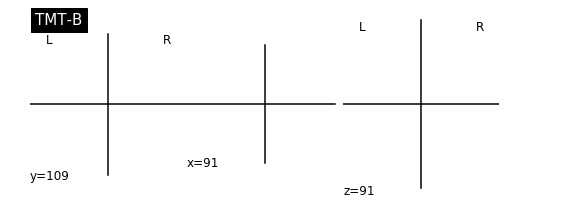

In [6]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_dsn_tmtbz_tfce_corrp_tstat1.nii.gz', threshold = 0.90, title = 'TMT-B')

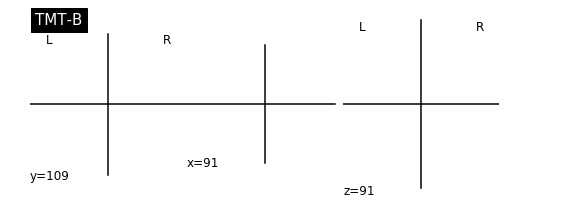

In [8]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_dsn_tmtbz_tfce_corrp_tstat2.nii.gz', threshold = 0.90, title = 'TMT-B')

In [18]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
ls *.con

printf "1\n-1" > 1var.txt
Text2Vest 1var.txt 1var.con

randomise -i all_FA_skeletonised -o tbss_ya_dsn_tmtbz -d dsn_tmtbz.mat \
-t 1var.con -n 500 --T2 -D

3var.con
4var.con
randomise options: -i all_FA_skeletonised -o tbss_ya_dsn_tmtbz -d dsn_tmtbz.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
7.96097e+53 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 3

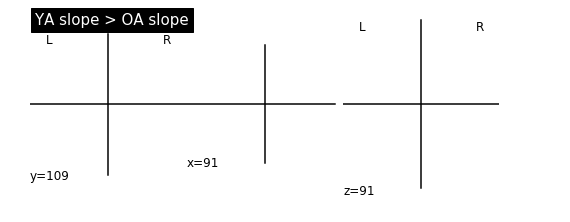

In [7]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_dsn_tmtbz_tfce_corrp_tstat1.nii.gz', threshold = 0.90, title = 'YA slope > OA slope')


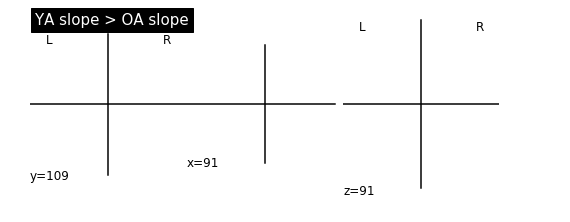

In [9]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_dsn_tmtbz_tfce_corrp_tstat2.nii.gz', threshold = 0.90, title = 'YA slope > OA slope')


## Interaction Age Group x Rhythm Amplitude and WM

1. Concatenate all_FA images
2. Run fsl randomise looking for interaction of age group x RAR amplitude

In [7]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -h

printf "\nYoung Adults All FA\n"
fslinfo tbss_ya/stats/all_FA

printf "\nOlder Adults All FA\n"
fslinfo tbss_oa/stats/all_FA


Usage: fslmerge <-x/y/z/t/a/tr> <output> <file1 file2 .......> [tr value in seconds]
     -t : concatenate images in time
     -x : concatenate images in the x direction
     -y : concatenate images in the y direction
     -z : concatenate images in the z direction
     -a : auto-choose: single slices -> volume, volumes -> 4D (time series)
     -tr : concatenate images in time and set the output image tr to the final option value

Young Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		46
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+

Older Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		57
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


In [48]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -t tbss/stats/all_FA_YA-OA tbss_ya/stats/all_FA tbss_oa/stats/all_FA

In [11]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslinfo tbss/stats/all_FA_YA-OA

data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		103
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


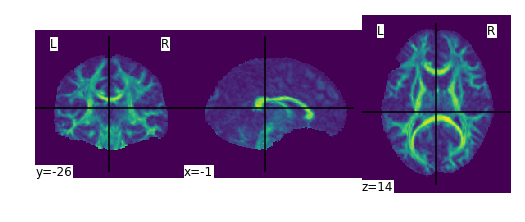

In [50]:
from nilearn import image
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
nii = scan_dir + 'tbss/stats/all_FA_YA-OA.nii.gz'
first_vol = image.index_img(nii, 0)
plotting.plot_img(first_vol)

In [42]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

In [52]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmaths tbss/stats/all_FA_YA-OA -Tmean -thr 0.25 -bin tbss/stats/all_FA_YA-OA_mask

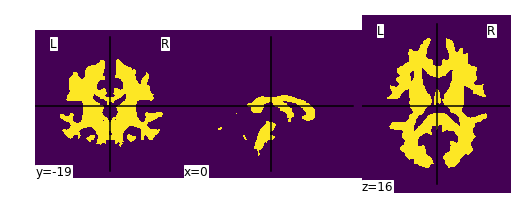

In [53]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss/stats/all_FA_YA-OA_mask.nii.gz')

[FSL GLM 2 groups, continuous covariate interaction](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM#Two_Groups_with_continuous_covariate_interaction) <br>

[Mumford Brain Stats](http://mumford.fmripower.org/mean_centering/)

In [40]:
import numpy as np
import pandas as pd
import os

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

x1 = np.concatenate((np.ones(46), np.zeros(57)))
x2 = np.concatenate((np.zeros(46), np.ones(57)))

d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv', usecols = ['record_id', 'actamp'])
d = d.sort_values('record_id', ascending = True)
d = d.set_index('record_id')

ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
files = pd.DataFrame(np.concatenate([ya_files, oa_files]), columns = ['files'])
files['record_id'] = files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
files = files.set_index('record_id')

dsn = []
dsn = files.join(d, sort=True).dropna(subset = ['files'])

dsn['actamp'] = dsn['actamp'].fillna(dsn['actamp'].mean())
#NOT mean centering because testing the interaction
dsn

x3 = x1 * dsn['actamp'].values
x4 = x2 * dsn['actamp'].values

dsnmat = np.column_stack((x1, x2, x3, x4))
dsnmat

np.savetxt(scan_dir + 'tbss/stats/ya_oa_amp-ya_amp-oa.txt', dsnmat, fmt = '%f')

In [41]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

Text2Vest ya_oa_amp-ya_amp-oa.txt ya_oa_amp-ya_amp-oa.mat

printf "0 0 -1 1\n0 0 1 -1" > int.txt
Text2Vest int.txt int.con

In [59]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_int -m all_FA_YA-OA_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_YA-OA -o tbss_int -m all_FA_YA-OA_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.70561e+156 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
S

In [60]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_int*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_tstat2.nii.gz


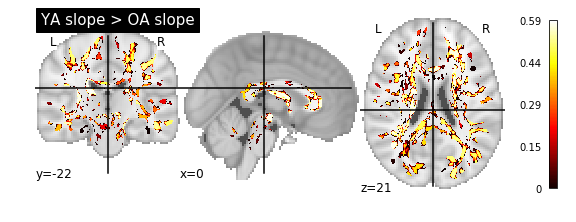

In [66]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_tfce_corrp_tstat1.nii.gz', title = 'YA slope > OA slope')

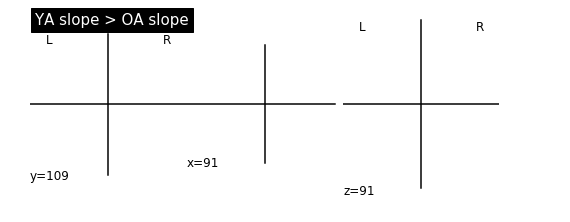

In [67]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_tfce_corrp_tstat1.nii.gz', threshold = 0.90, title = 'YA slope > OA slope')

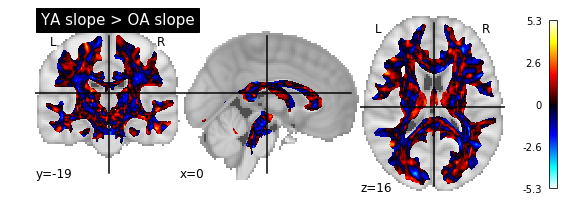

In [121]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_tstat1.nii.gz', title = 'YA slope > OA slope')


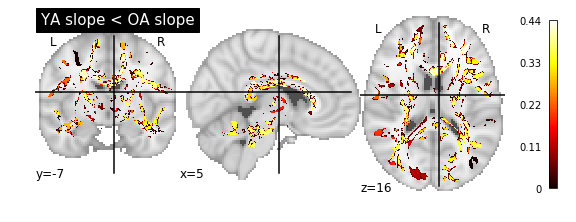

In [68]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_tfce_corrp_tstat2.nii.gz', title = 'YA slope < OA slope')

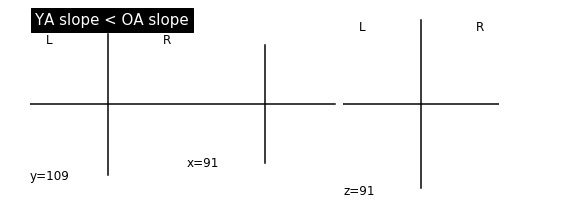

In [119]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_tfce_corrp_tstat2.nii.gz', threshold = 0.90, title = 'YA slope < OA slope')

## Age Group Differences in WM

In [75]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

design_ttest2 dsn_ttest 46 57

In [126]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_agegroup -m all_FA_YA-OA_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_YA-OA -o tbss_agegroup -m all_FA_YA-OA_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Star

In [127]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_agegroup*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tstat2.nii.gz


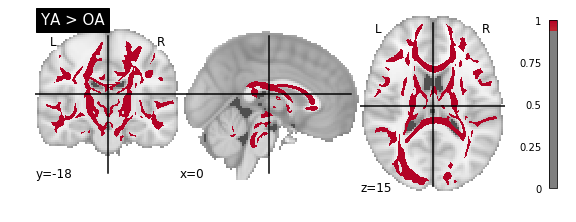

In [128]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_tfce_corrp_tstat1.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA > OA')


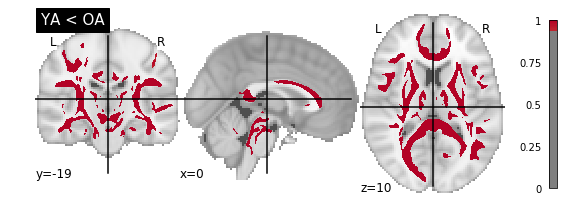

In [129]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_tfce_corrp_tstat2.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA < OA')


Why are we seeing areas of greater FA in older adults relative to young adults?

1. Checked all_FA image - First all_FA for OA corresponds to #47 of concatenated all_FA
2. Checked design matrix, matches
3. Checked contrast, matches
4. Rerun with JHU as WM mask?

### Rerun age group differences t-test using JHU atlas as mask

In [132]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -bin jhumask

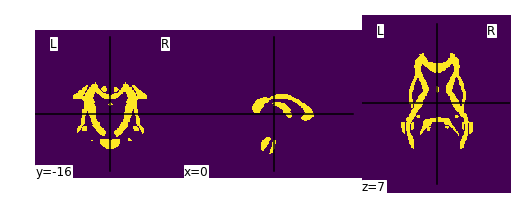

In [133]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'roi/jhumask.nii.gz')

In [134]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_agegroup_jhu -m ../../roi/jhumask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_YA-OA -o tbss_agegroup_jhu -m ../../roi/jhumask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31


In [135]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_agegroup_jhu*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tstat2.nii.gz


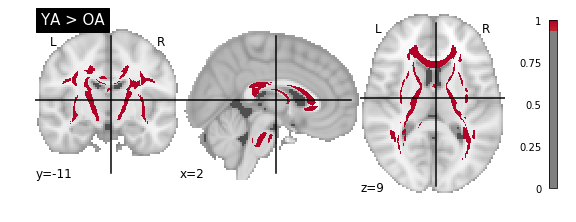

In [143]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat1.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA > OA')


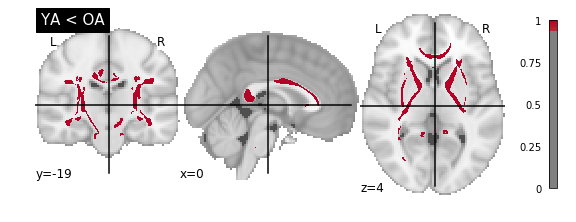

In [142]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat2.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA < OA')


Still seeing some regions where OA FA > YA FA?

### Rerun interaction model with JHU mask

In [145]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_int_jhu -m ../../roi/jhumask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_YA-OA -o tbss_int_jhu -m ../../roi/jhumask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.70561e+156 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 

In [146]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_int_jhu*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tstat2.nii.gz


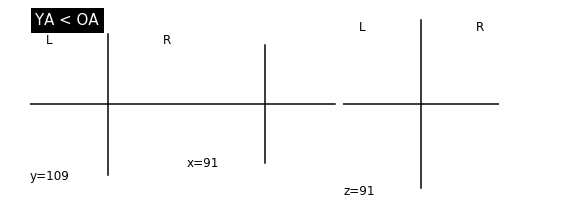

In [151]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, title = 'YA < OA')


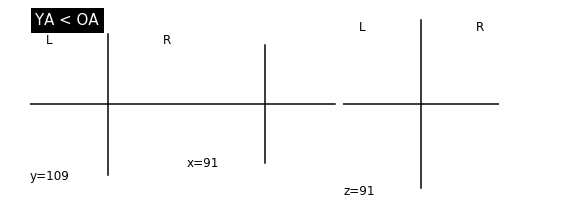

In [152]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_jhu_tfce_corrp_tstat2.nii.gz', threshold = 0.95, title = 'YA < OA')


No significant interaction effect

## Rhythm Amplitude Effect Controlling for Age and Sex within Age Groups

[FSL GLM](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM) <br>
Note that categorical covariates (e.g. gender) are treated in exactly the same way as continuous covariates - that is, use two indicator values (e.g. 0 and 1) and then demean these values as appropriate before entering them into the EV. <br>

In [93]:
d[['record_id', 'Group', 'actamp', 'age', 'sex']]

,record_id,Group,actamp,age,sex
0,30003,Young Adults,1.389856,22,0
1,30004,Young Adults,1.630892,27,0
2,30008,Young Adults,1.610484,18,0
3,30009,Young Adults,1.951245,25,0
4,30012,Young Adults,NaN,30,1
...,...,...,...,...,...
125,40861,Older Adults,1.120207,69,1
126,40876,Older Adults,1.655076,71,0
127,40878,Older Adults,1.851044,71,1
128,40891,Older Adults,NaN,71,1


In [171]:
d[['record_id', 'Group', 'actamp', 'fact', 'age', 'sex']].isnull().sum()

record_id     0
Group         0
actamp       22
fact         22
age           0
sex           0
dtype: int64

In [173]:
oa_dsn

,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,...,cowat_zscore,cowat_perseveration,cowat_errors,time_trails_a,error_trails_a,trails_a_z_score,time_trails_b,error_trails_b,trails_b_z_score,neuropsych_scoring_complete
record_id,,,,,,,,,,,,,,,,,,,,,
40160,2.009123,4.375208,16.122209,0.000000,1.004561,8.679981,23.564437,-0.368665,0.620186,0.516000,...,0.413223,0.0,1.0,32.0,0.0,-0.097701,57.0,0.0,0.407746,2.0
40170,1.000000,18.357338,11.793086,0.316077,0.816077,6.613137,16.973035,0.213045,0.431662,0.228348,...,-0.578512,0.0,0.0,37.0,0.0,-0.472347,79.0,0.0,-1.276047,2.0
40175,3.145629,1.734867,19.382784,0.166639,1.739453,13.382784,25.382784,1.000000,0.500000,0.275306,...,-1.570248,0.0,0.0,30.0,0.0,0.197309,47.0,0.0,2.161117,2.0
40288,1.723074,7.834020,14.388184,0.060388,0.921925,6.822426,21.953941,-0.398529,0.630480,0.500125,...,0.495868,0.0,1.0,35.0,0.0,-0.528736,71.0,1.0,-0.345347,2.0
40351,2.034903,2.818258,15.697647,0.000000,1.017451,8.838205,22.557089,-0.223106,0.571620,0.414192,...,0.000000,3.0,0.0,26.0,0.0,0.764368,67.0,0.0,-0.130178,2.0
40490,1.494343,7.446880,16.223988,0.150002,0.897174,7.636321,24.811655,-0.626806,0.715639,0.292686,...,1.983471,0.0,0.0,34.0,0.0,0.423343,55.0,0.0,1.299128,2.0
40496,1.856626,4.708866,14.932983,0.108322,1.036635,8.295505,21.570462,-0.166116,0.553123,0.480890,...,-0.082645,3.0,1.0,22.0,0.0,1.769806,52.0,0.0,1.624060,2.0
40512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.578512,3.0,1.0,26.0,0.0,0.764368,50.0,0.0,0.784293,2.0
40519,1.484620,16.917736,16.443227,0.162149,0.904459,8.550522,24.335932,-0.475478,0.657725,0.389888,...,1.818182,1.0,0.0,25.0,2.0,0.908046,77.0,1.0,-0.668101,2.0


In [174]:
imp = []
imp = oa_dsn[['actamp', 'fact', 'age', 'sex']]

imp['actamp'] = imp['actamp'].fillna(oa_dsn['actamp'].mean())
imp['actamp'] = imp['actamp'] - imp['actamp'].mean()

imp['fact'] = imp['fact'].fillna(oa_dsn['fact'].mean())
imp['fact'] = imp['fact'] - imp['fact'].mean()

imp['age'] = imp['age'] - imp['age'].mean()

imp['sex'] = imp['sex'] - imp['sex'].mean()

imp

np.savetxt(scan_dir + 'tbss_oa/stats/dsn_amp7-age-sex.txt', imp[['actamp', 'age', 'sex']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_oa/stats/dsn_amp7.txt', imp[['actamp']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_oa/stats/dsn_fact7.txt', imp[['fact']].values, fmt = '%f')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [175]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

Text2Vest dsn_amp7-age-sex.txt dsn_amp7-age-sex.mat
Text2Vest dsn_amp7.txt dsn_amp7.mat
Text2Vest dsn_fact7.txt dsn_fact7.mat

printf "1 0 0\n1 1 0\n1 -1 0\n-1 0 0\n-1 1 0" > 3var.txt
Text2Vest 3var.txt 3var.con
more 3var.con

/NumWaves 3
/NumPoints 5
/Matrix
1 0 0
1 1 0
1 -1 0
-1 0 0
-1 1 0

In [176]:
imp = []
imp = ya_dsn[['actamp', 'fact', 'age', 'sex']]

imp['actamp'] = imp['actamp'].fillna(ya_dsn['actamp'].mean())
imp['actamp'] = imp['actamp'] - imp['actamp'].mean()

imp['fact'] = imp['fact'].fillna(ya_dsn['fact'].mean())
imp['fact'] = imp['fact'] - imp['fact'].mean()

imp['age'] = imp['age'] - imp['age'].mean()

imp['sex'] = imp['sex'] - imp['sex'].mean()

imp['ones'] = np.ones(len(imp))

imp

np.savetxt(scan_dir + 'tbss_ya/stats/dsn_amp7-age-sex.txt', imp[['actamp', 'age', 'sex']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_ya/stats/dsn_amp7.txt', imp[['actamp']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_ya/stats/dsn_fact7.txt', imp[['fact']].values, fmt = '%f')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [177]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

Text2Vest dsn_amp7-age-sex.txt dsn_amp7-age-sex.mat
Text2Vest dsn_amp7.txt dsn_amp7.mat
Text2Vest dsn_fact7.txt dsn_fact7.mat

printf "1 0 0\n1 1 0\n1 -1 0\n-1 0 0\n-1 1 0" > 3var.txt
Text2Vest 3var.txt 3var.con

In [178]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_FA -m ../../roi/jhumask -o tbss_oa_1-amp7-age-sex_jhu -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_FA -m ../../roi/jhumask -o tbss_oa_1-amp7-age-sex_jhu -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permuta

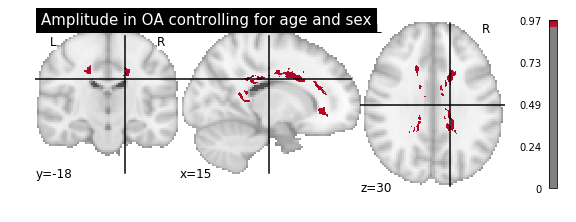

In [186]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_1-amp7-age-sex_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in OA controlling for age and sex')


In [195]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

cluster -i tbss_oa_1-amp7-age-sex_jhu_tfce_corrp_tstat1.nii.gz -t 0.95 --mm > cluster_t1_95_5-1.txt

more cluster_t1_95_5-1.txt

Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
1	10269	0.974	19	14	29	2.32	-4.27	21.6


Not controlling for age and sex

In [1]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_FA -m ../../roi/jhumask -o tbss_oa_amp7_jhu -d dsn_amp7.mat \
-t 1var.con -n 500 --T2 -D

randomise options: -i all_FA -m ../../roi/jhumask -o tbss_oa_amp7_jhu -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Starting p

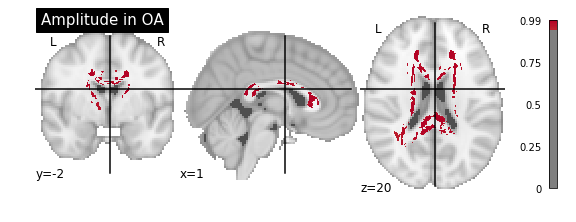

In [3]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_amp7_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in OA')


In [114]:
%%bash
#skeleton
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_FA_skeletonised -o tbss_oa_1-amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_oa_1-amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Star

In [187]:
%%bash
#jhu mask all FA 
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_FA -m ../../roi/jhumask -o tbss_ya_amp7-age-sex_jhu -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_FA -m ../../roi/jhumask -o tbss_ya_amp7-age-sex_jhu -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutati

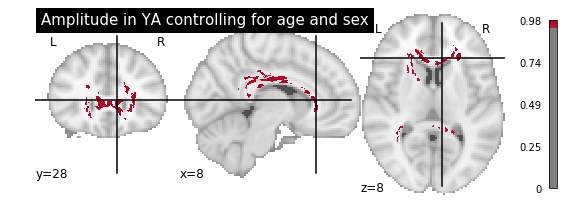

In [189]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_amp7-age-sex_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in YA controlling for age and sex')


In [194]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

cluster -i tbss_ya_amp7-age-sex_jhu_tfce_corrp_tstat1.nii.gz -t 0.95 --mm > cluster_t1_95_5-1.txt

more cluster_t1_95_5-1.txt

Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
3	13735	0.982	17	30	-12	-1.83	-0.972	17.9
2	79	0.954	41	-34	-5	39.3	-37.5	0.519
1	47	0.954	-38	-50	-4	-38	-49.4	-3.87


Not controlling for age and sex

In [4]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_FA -m ../../roi/jhumask -o tbss_ya_amp7_jhu -d dsn_amp7.mat \
-t 1var.con -n 500 --T2 -D

randomise options: -i all_FA -m ../../roi/jhumask -o tbss_ya_amp7_jhu -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Starting p

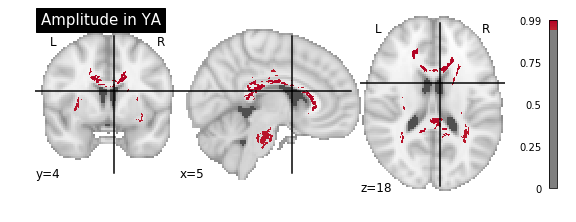

In [5]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_amp7_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in YA')


In [6]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

In [9]:
%%bash

#Extract map with regions of overlap for YA and OA

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
fslmaths tbss_ya_amp7_jhu_tfce_corrp_tstat1.nii.gz -thr 0.95 -bin tbss_ya_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
fslmaths tbss_oa_amp7_jhu_tfce_corrp_tstat1.nii.gz -thr 0.95 -bin tbss_oa_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats
fslmaths ../../tbss_oa/stats/tbss_oa_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz -mul 2 -add ../../tbss_ya/stats/tbss_ya_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz tbss_amp7_jhu_tfce_corrp_tstat1_bin_yaoa-sum.nii.gz

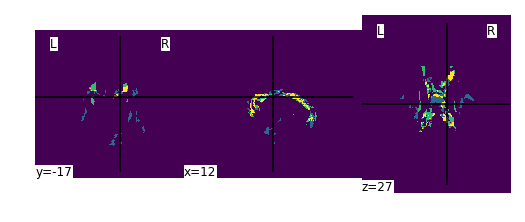

In [10]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss/stats/tbss_amp7_jhu_tfce_corrp_tstat1_bin_yaoa-sum.nii.gz')


In [115]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_FA_skeletonised -o tbss_ya_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_ya_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Starti

In [116]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_MD_skeletonised -o tbss_oa_MD_1-amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_oa_MD_1-amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
S

In [118]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_MD_skeletonised -o tbss_ya_MD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_MD_skeletonised -o tbss_ya_MD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

In [119]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_AD_skeletonised -o tbss_oa_AD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_AD_skeletonised -o tbss_oa_AD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

In [120]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_AD_skeletonised -o tbss_ya_AD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_AD_skeletonised -o tbss_ya_AD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

In [121]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_AD_skeletonised -o tbss_oa_RD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_AD_skeletonised -o tbss_oa_RD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

In [122]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_RD_skeletonised -o tbss_ya_RD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_RD_skeletonised -o tbss_ya_RD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

## Notes

03/2020: For PsychFest results, used this:

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

randomise -i all_FA -o tbss_ya_amp7_skel -m mean_FA_skeleton_mask -d dsn_amp7.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_fact7_skel -m mean_FA_skeleton_mask -d dsn_fact7.mat -t design_CR.con -n 500 --T2 -D


In [ ]:
tbss_fill tbss_oa_amp7_skel_tfce_corrp_tstat1 0.95 mean_FA tbss_fill_amp7
tbss_fill tbss_ya_amp7_skel_tfce_corrp_tstat1 0.95 mean_FA tbss_fill_amp7

### BMI Correlations

In [ ]:
bmi = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/Redcap/bmi.csv').dropna().reset_index()
bmi[0:5]

In [ ]:
def calculate_bmi(data, i):
    #print(bmi['sub_id'].iloc[i])
    
    feet = float(bmi['height_mri'].iloc[i].split("\'")[0])*12
    inches = float(bmi['height_mri'].iloc[i].split("\'")[1].split('"')[0])
    height = feet + inches
    weight = float(bmi['weight_mri'].iloc[i])
    
    body_mass_index = round( (weight * 703) / (height ** 2) , 2)
    
    return body_mass_index

In [ ]:
body_mass_index = []

for i in bmi.index:
    
    body_mass_index.append(calculate_bmi(bmi, i))

body_mass_index = pd.DataFrame(body_mass_index, columns = ['bmi'])
bmi_df = pd.concat([bmi, body_mass_index], axis = 1).reset_index().drop(columns = ['level_0', 'index'])
bmi_df[0:5]

In [ ]:
oa_df_n = oa_df.merge(bmi_df[bmi_df['sub_id'] > 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')
ya_df_n = ya_df.merge(bmi_df[bmi_df['sub_id'] < 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')

Some of these values aren't right (eg. > 200)

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("CC FA")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs CC FA")

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['actalph'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['actalph'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("Width (alpha)")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs Duration of Peak Activity")

# Creating ROIs from coordinates

[Andy's Brain Blog](http://andysbrainblog.blogspot.com/2013/04/fsl-tutorial-creating-rois-from.html)

In [2]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

`-roi <xmin> <xsize> <ymin> <ysize> <zmin> <zsize> <tmin> <tsize> : zero outside roi (using voxel coordinates). Inputting -1 for a size will set it to the full image extent for that dimension.`

In [5]:
%%bash

ls $FSLDIR/data/standard

FMRIB58_FA-skeleton_1mm.nii.gz
FMRIB58_FA_1mm.nii.gz
FSL_HCP1065_FA_1mm.nii.gz
FSL_HCP1065_L1_1mm.nii.gz
FSL_HCP1065_L2_1mm.nii.gz
FSL_HCP1065_L3_1mm.nii.gz
FSL_HCP1065_MD_1mm.nii.gz
FSL_HCP1065_MO_1mm.nii.gz
FSL_HCP1065_V1_1mm.nii.gz
FSL_HCP1065_V2_1mm.nii.gz
FSL_HCP1065_V3_1mm.nii.gz
FSL_HCP1065_tensor_1mm.nii.gz
Fornix_FMRIB_FA1mm.nii.gz
LowerCingulum_1mm.nii.gz
MNI152_T1_0.5mm.nii.gz
MNI152_T1_1mm.nii.gz
MNI152_T1_1mm_BigFoV_facemask.nii.gz
MNI152_T1_1mm_Hipp_mask_dil8.nii.gz
MNI152_T1_1mm_brain.nii.gz
MNI152_T1_1mm_brain_mask.nii.gz
MNI152_T1_1mm_brain_mask_dil.nii.gz
MNI152_T1_1mm_first_brain_mask.nii.gz
MNI152_T1_2mm.nii.gz
MNI152_T1_2mm_LR-masked.nii.gz
MNI152_T1_2mm_VentricleMask.nii.gz
MNI152_T1_2mm_b0.nii.gz
MNI152_T1_2mm_brain.nii.gz
MNI152_T1_2mm_brain_mask.nii.gz
MNI152_T1_2mm_brain_mask_deweight_eyes.nii.gz
MNI152_T1_2mm_brain_mask_dil.nii.gz
MNI152_T1_2mm_brain_mask_dil1.nii.gz
MNI152_T1_2mm_edges.nii.gz
MNI152_T1_2mm_eye_mask.nii.gz
MNI152_T1_2mm_skull.nii.gz
MNI152_T1

## Selected ROIs

1. Frontal forceps (23 32 4) --> 67/113 158 76
2. Posterior forceps (34 51 0) --> 56/124 177 72
3. Longitudinal fasciculus (19 -18 37 --> 78/102 108 109; -21 -13 23 --> 111/69 113 95)
4. YA cluster (36 -11 28) --> 54/126 115 100
5. Corpus callosum

[Thresholding](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A2=fsl;27fa5348.1409)

In [5]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 67 1 158 1 76 1 0 1 FFpoint_R -odt float
fslmaths FFpoint_R -kernel sphere 6 -fmean -thr 0.001 -bin FFsphere_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 113 1 158 1 76 1 0 1 FFpoint_L -odt float
fslmaths FFpoint_L -kernel sphere 6 -fmean -thr 0.001 -bin FFsphere_L -odt float


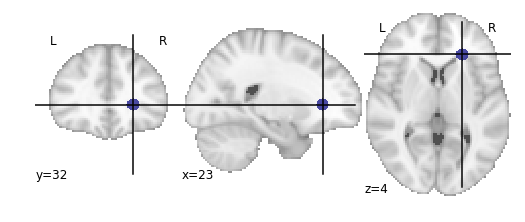

In [7]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/FFsphere_R.nii.gz')

In [6]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 56 1 177 1 72 1 0 1 PFpoint_R -odt float
fslmaths PFpoint_R -kernel sphere 6 -fmean -thr 0.001 -bin PFsphere_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 124 1 177 1 72 1 0 1 PFpoint_L -odt float
fslmaths PFpoint_L -kernel sphere 6 -fmean -thr 0.001 -bin PFsphere_L -odt float


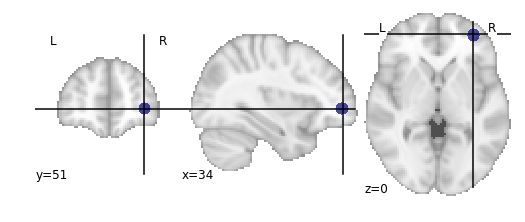

In [8]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/PFsphere_R.nii.gz')

In [9]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 78 1 108 1 109 1 0 1 LFpoint1_R -odt float
fslmaths LFpoint1_R -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere1_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 102 1 108 1 109 1 0 1 LFpoint1_L -odt float
fslmaths LFpoint1_L -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere1_L -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 69 1 113 1 95 1 0 1 LFpoint2_R -odt float
fslmaths LFpoint2_R -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere2_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 111 1 113 1 95 1 0 1 LFpoint2_L -odt float
fslmaths LFpoint2_L -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere2_L -odt float


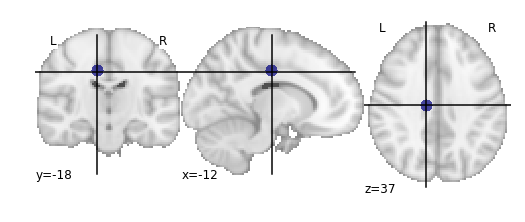

In [10]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/LFsphere1_L.nii.gz')

In [103]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi
mkdir stats

for i in `ls *sphere*`; do
echo $i
outfile="`echo ${i##*/.nii.gz} | cut -d. -f1`"

echo "fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_oa_tstat_means.txt;"
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_oa_tstat_means.txt;

echo "fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_ya_tstat_means.txt;"
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_ya_tstat_means.txt;
done


FFsphere_L.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k FFsphere_L.nii.gz -M >> stats/FFsphere_L_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k FFsphere_L.nii.gz -M >> stats/FFsphere_L_ya_tstat_means.txt;
FFsphere_R.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k FFsphere_R.nii.gz -M >> stats/FFsphere_R_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k FFsphere_R.nii.gz -M >> stats/FFsphere_R_ya_tstat_means.txt;
LFsphere1_L.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k LFsphere1_L.nii.gz -M >> stats/LFsphere1_L_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k LFsphere1_L.nii.gz -M >> stats/LFsphere1_L_ya_tstat_means.txt;
LFsphere1_R.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k LFsphere1_R.nii.gz -M >> stats/LFsphere1_R_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k LFsphere1_R.n

mkdir: stats: File exists
ERROR:: Empty mask image
ERROR:: Empty mask image
ERROR:: Empty mask image
ERROR:: Empty mask image


In [107]:
%%bash

fslmeants -h



Part of FSL (ID: 6.0.3:b862cdd5)
fslmeants
Copyright(c) 2004-2009, University of Oxford (Mark Jenkinson, Christian F. Beckmann)
Prints average timeseries (intensities) to the screen (or saves to a file).
The average is taken over all voxels in the mask (or all voxels in the image if no mask is specified).


Usage: 
fslmeants -i filtered_func_data -o meants.txt -m my_mask
fslmeants -i filtered_func_data -m my_mask
fslmeants -i filtered_func_data -c 24 19 10

Compulsory arguments (You MUST set one or more of):
	-i <filename>	input 4D image

Optional arguments (You may optionally specify one or more of):
	-o <filename>	output text matrix
	-m <filename>	input 3D mask
	-c <x y z>	requested spatial coordinate (instead of mask)
	--usemm		use mm instead of voxel coordinates (for -c option)
	--showall	show all voxel time series (within mask) instead of averaging
	--eig	        calculate Eigenvariate(s) instead of mean (output will have 0 mean)
	--order	        select number of Eigenvariates (d

CalledProcessError: Command 'b'\nfslmeants -h\n'' returned non-zero exit status 1.

In [109]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi
mkdir stats

for i in `ls *sphere*`; do
echo $i
outfile="`echo ${i##*/.nii.gz} | cut -d. -f1`"

echo "fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m $i -o stats/${outfile}_oa_fa_means.txt;"
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m $i -o stats/${outfile}_oa_fa_means.txt;

echo "fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m $i -o stats/${outfile}_ya_fa_means.txt;"
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m $i -o stats/${outfile}_ya_fa_means.txt;
done

FFsphere_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m FFsphere_L.nii.gz -o stats/FFsphere_L_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m FFsphere_L.nii.gz -o stats/FFsphere_L_ya_fa_means.txt;
FFsphere_R.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m FFsphere_R.nii.gz -o stats/FFsphere_R_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m FFsphere_R.nii.gz -o stats/FFsphere_R_ya_fa_means.txt;
LFsphere1_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere1_L.nii.gz -o stats/LFsphere1_L_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m LFsphere1_L.nii.gz -o stats/LFsphere1_L_ya_fa_means.txt;
LFsphere1_R.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere1_R.nii.gz -o stats/LFsphere1_R_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m LFsphere1_R.nii.gz -o stats/LFsphere1_R_ya_fa_means.txt;
LFsphere2_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere2_L.nii.gz -o stats/LFsphere

mkdir: stats: File exists


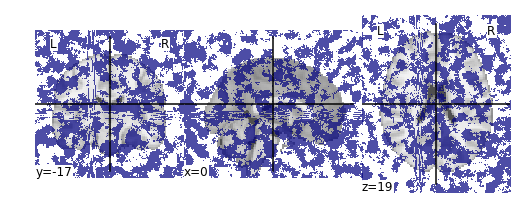

In [3]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/FFsphere1.nii.gz')

## Interaction using skeleton

In [1]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

design_ttest2 dsn_ttest 46 57

In [2]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_agegroup -m mean_FA_skeleton_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_skeletonised -o tbss_agegroup -m mean_FA_skeleton_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

In [5]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/dsn_ttest.mat

/NumWaves 2
/NumPoints 103
/PPheights 1 1
/Matrix
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


In [4]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/dsn_ttest.con

/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
1 -1
-1 1


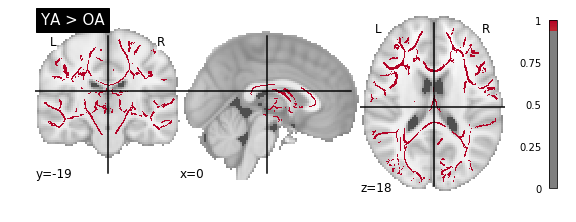

In [8]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_agegroup_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA > OA')


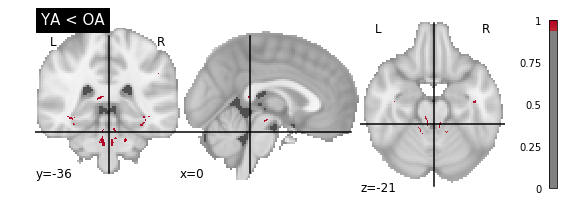

In [7]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_agegroup_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA < OA')


# Amplitude Interaction by Age Group

In [9]:
%%bash

cp /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/ya_oa_amp-ya_amp-oa.mat /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/.
cp /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/int.con /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/.


In [10]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_int_skel -m mean_FA_skeleton_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_int_skel -m mean_FA_skeleton_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.70561e+156 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting 

In [13]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/int.con


/NumWaves 4
/NumPoints 2
/Matrix
0 0 -1 1
0 0 1 -1

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


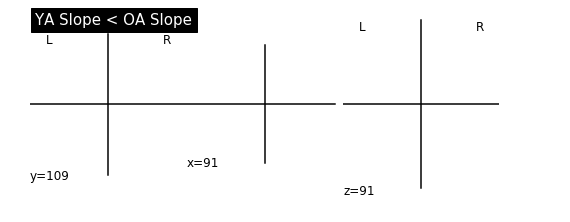

In [14]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_int_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA Slope < OA Slope')


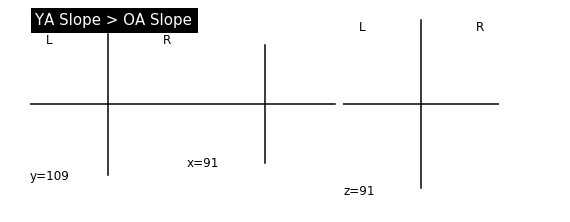

In [15]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_int_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA Slope > OA Slope')
